In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

In [11]:
df=pd.read_csv(r"D:\NANDAN's Documents\Infogerm int\Best selling books.csv")
df.head(5)

,Rank,Title,Author,Volume Sales,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","50,94,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","44,75,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","42,00,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","41,79,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","37,58,936",Random House,Romance & Sagas


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          100 non-null    int64 
 1   Title         100 non-null    object
 2   Author        100 non-null    object
 3   Volume Sales  100 non-null    object
 4   Publisher     100 non-null    object
 5   Genre         100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [15]:
df.isnull().sum()

Rank            0
Title           0
Author          0
Volume Sales    0
Publisher       0
Genre           0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,100.0,50.5,29.011492,1.0,25.75,50.5,75.25,100.0


In [19]:
data=df.copy()
# Remove commas and convert to numeric
data['Volume Sales'] = data['Volume Sales'].str.replace(',', '').astype(int)

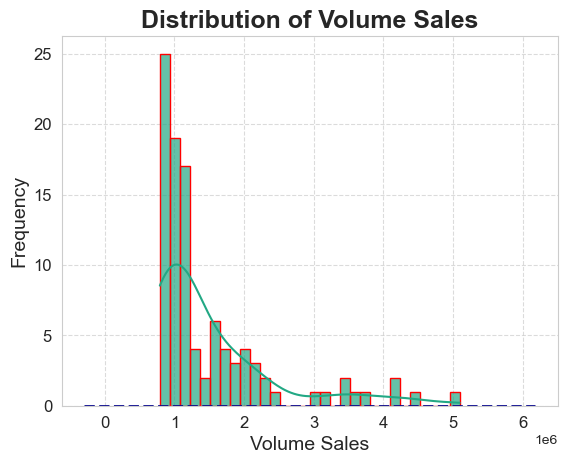

In [21]:
# histogram
sns.histplot(data['Volume Sales'], bins=30, kde=True, color=palette(0.6), edgecolor='red', alpha=0.7)

plt.title('Distribution of Volume Sales', fontsize=18, fontweight='bold')
plt.xlabel('Volume Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.kdeplot(data['Volume Sales'], color='darkblue', linewidth=2, linestyle='--')
plt.show()

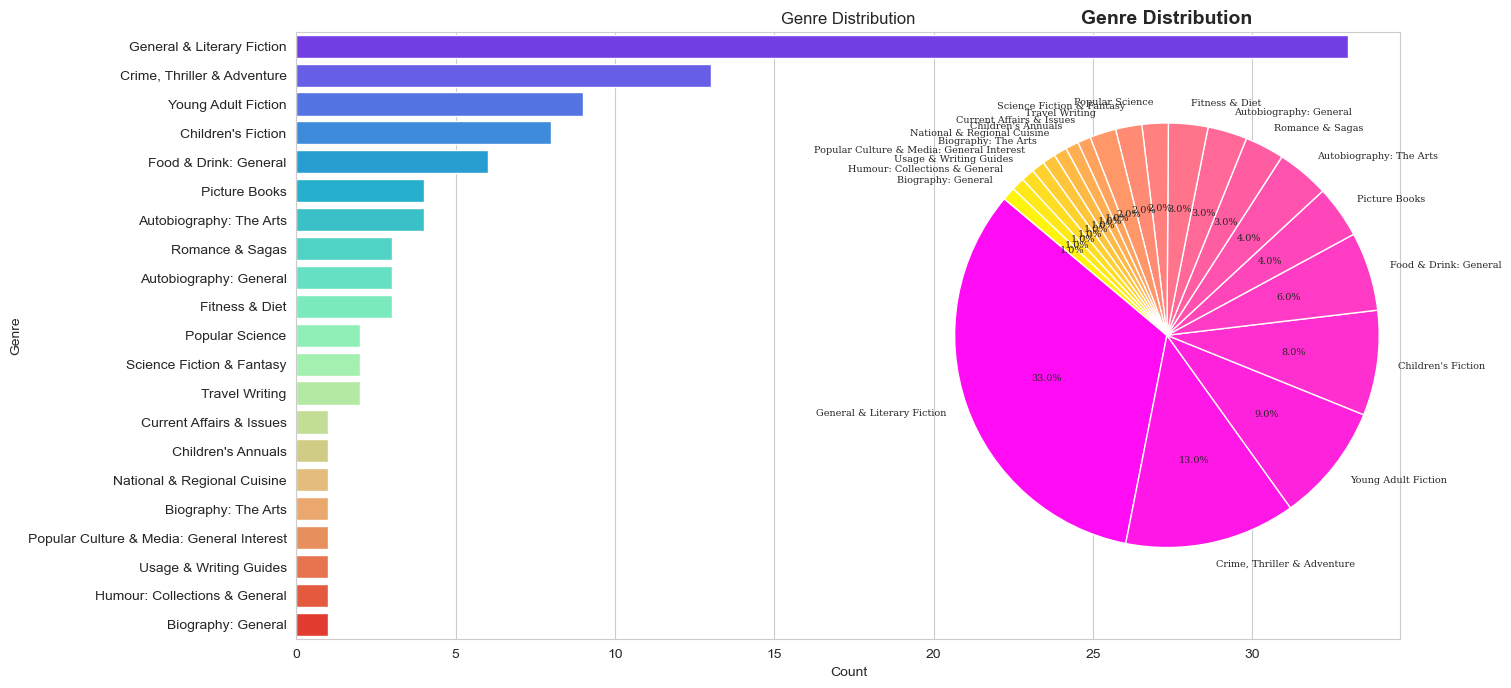

In [39]:
# Count plot for genre distribution
plt.figure(figsize=(16, 8))  
plt.subplot(1, 1, 1)
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index, palette='rainbow')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')

# Pie chart for genre distribution with font change
plt.subplot(1, 2, 2)
genre_distribution = data['Genre'].value_counts()
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('spring', len(genre_distribution)),
        textprops={'fontsize': 7, 'fontweight': 'normal', 'family': 'serif'})  
plt.title('Genre Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')

plt.tight_layout(pad=4.0)  
plt.show()

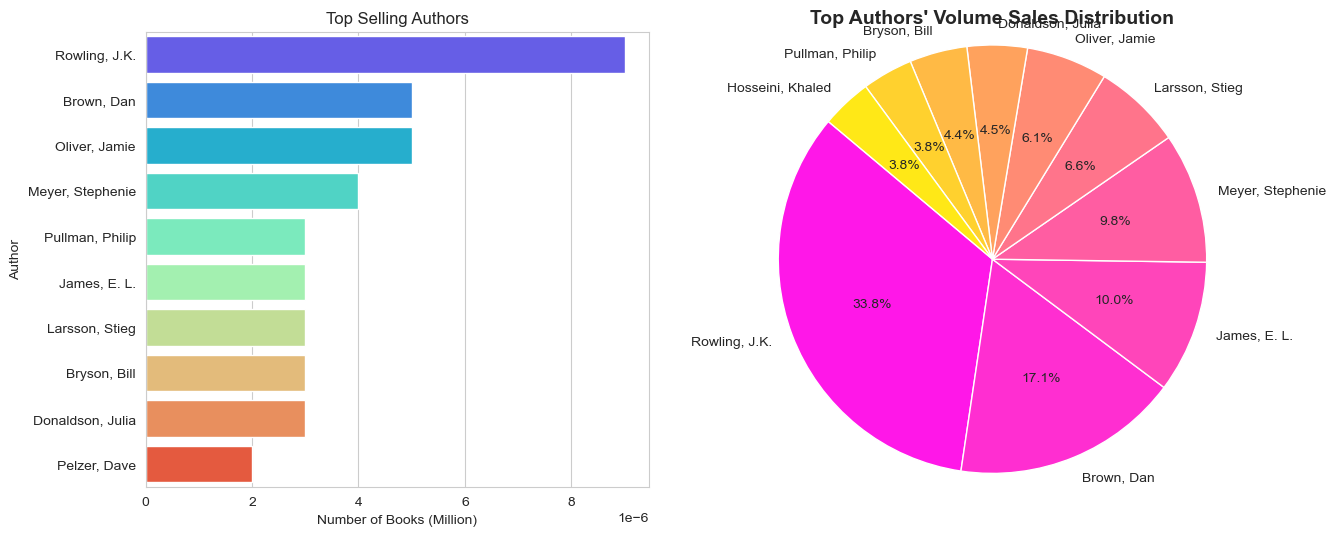

In [37]:
#  Bar plot for top selling authors
plt.figure(figsize=(14, 6))  
plt.subplot(1, 2, 1)
top_authors = data['Author'].value_counts().head(10)
sns.barplot(x=top_authors.values / 1e6, y=top_authors.index, palette='rainbow')  
plt.title('Top Selling Authors')
plt.xlabel('Number of Books (Million)')
plt.ylabel('Author')

# Pie chart for volume sales distribution
plt.subplot(1, 2, 2)
author_sales_distribution = data.groupby('Author')['Volume Sales'].sum().sort_values(ascending=False).head(10)
plt.pie(author_sales_distribution, labels=author_sales_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('spring', len(author_sales_distribution)))
plt.title('Top Authors\' Volume Sales Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout(pad=3.0)  
plt.show()

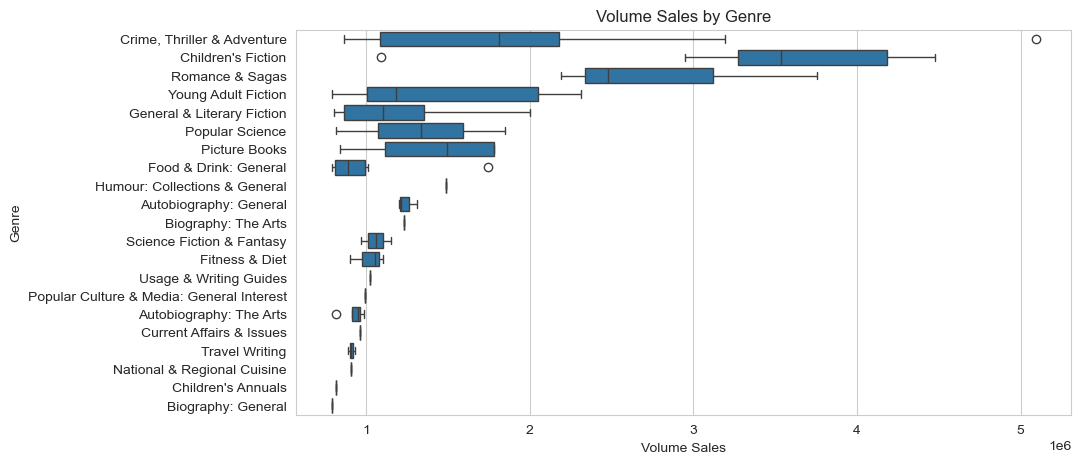

In [41]:
#volume sales by genre(box plot)
plt.figure(figsize=(10, 5))
sns.boxplot(y='Genre', x='Volume Sales', data=data, orient='h')
plt.title('Volume Sales by Genre')
plt.xlabel('Volume Sales')
plt.ylabel('Genre')
plt.show()

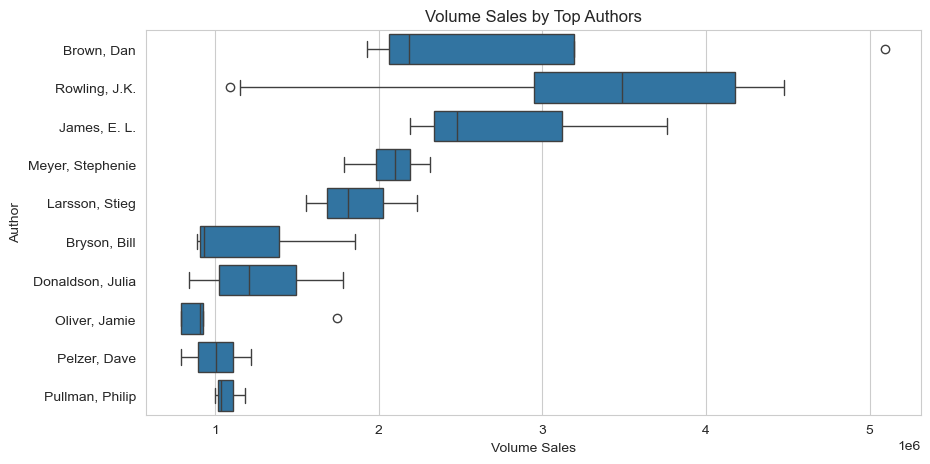

In [45]:
#Volume sales by top authors(box plot)
top_authors = data['Author'].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(y='Author', x='Volume Sales', data=data[data['Author'].isin(top_authors)], orient='h')
plt.title('Volume Sales by Top Authors')
plt.xlabel('Volume Sales')
plt.ylabel('Author')
plt.show()

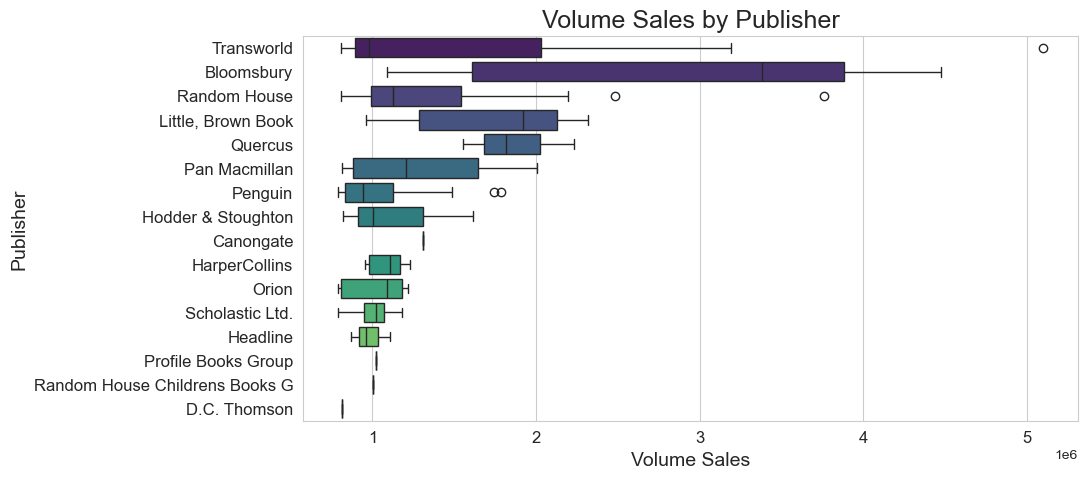

In [47]:
#Volume sales by publishers(Box plot) 
plt.figure(figsize=(10, 5))
sns.boxplot(y='Publisher', x='Volume Sales', data=data, orient='h', palette='viridis')
plt.title('Volume Sales by Publisher', fontsize=18, fontweight='normal')
plt.xlabel('Volume Sales', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()